In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Data Preparation & Transformation

In [5]:
# Membaca dataset
df = pd.read_csv('data.csv')
df['Target'] = pd.Categorical(df['Target'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   int64   
 1   Application mode                                4424 non-null   int64   
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   int64   
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   int64   
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   int64   
 8   Mother's qualification                          4424 non-null   int64   
 9   Father's qualification        

## EDA

C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


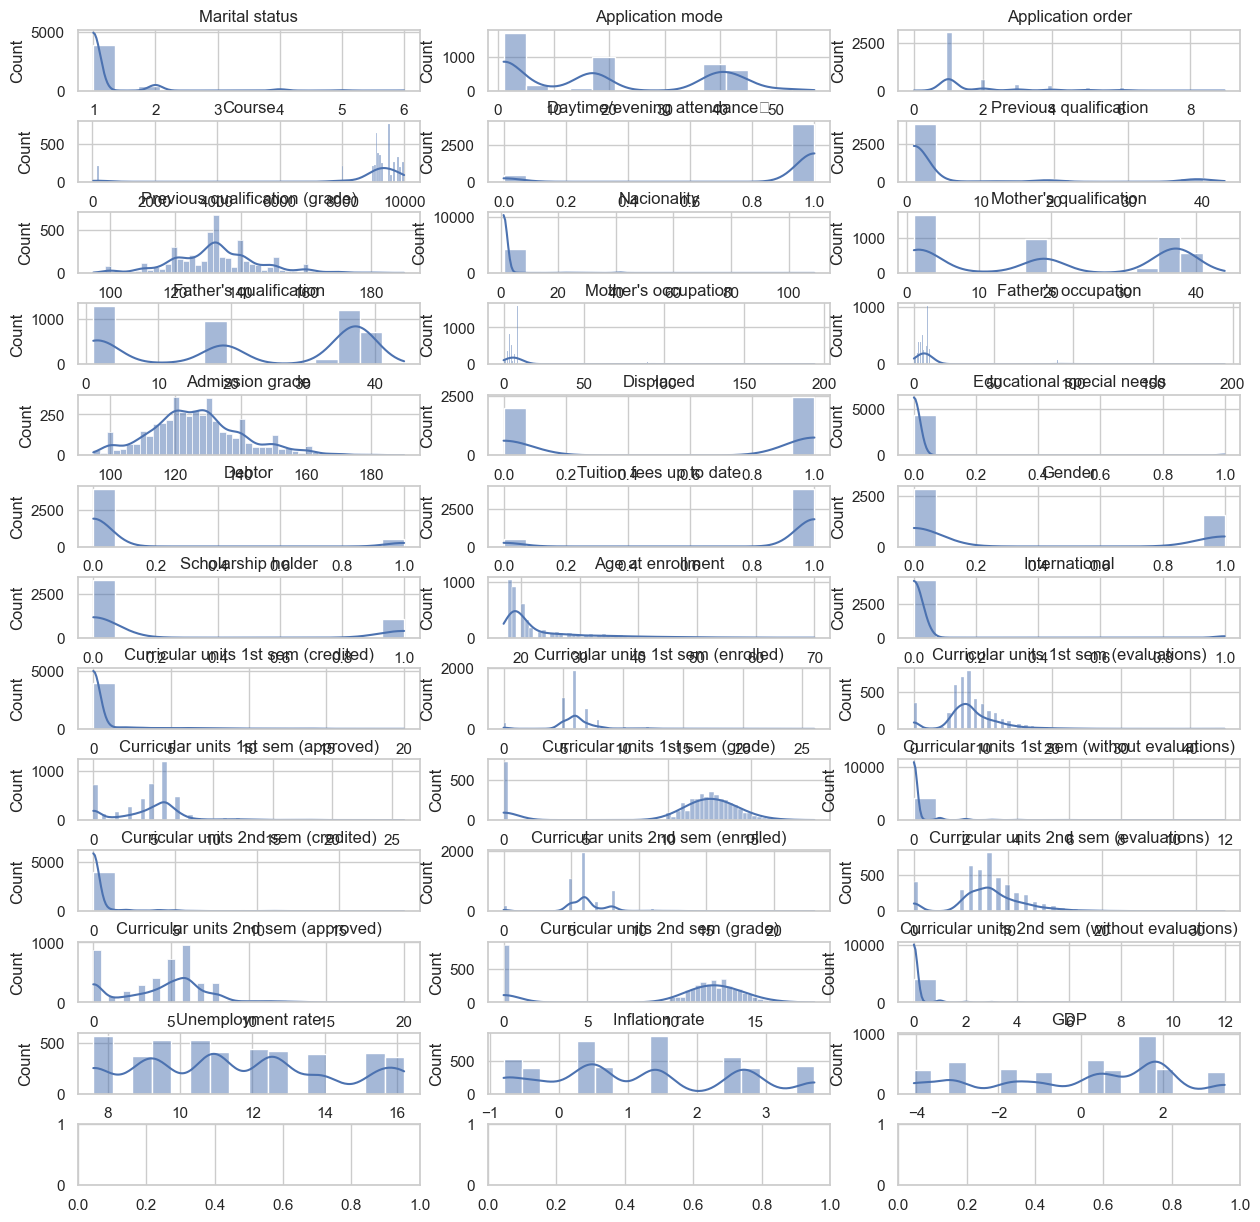

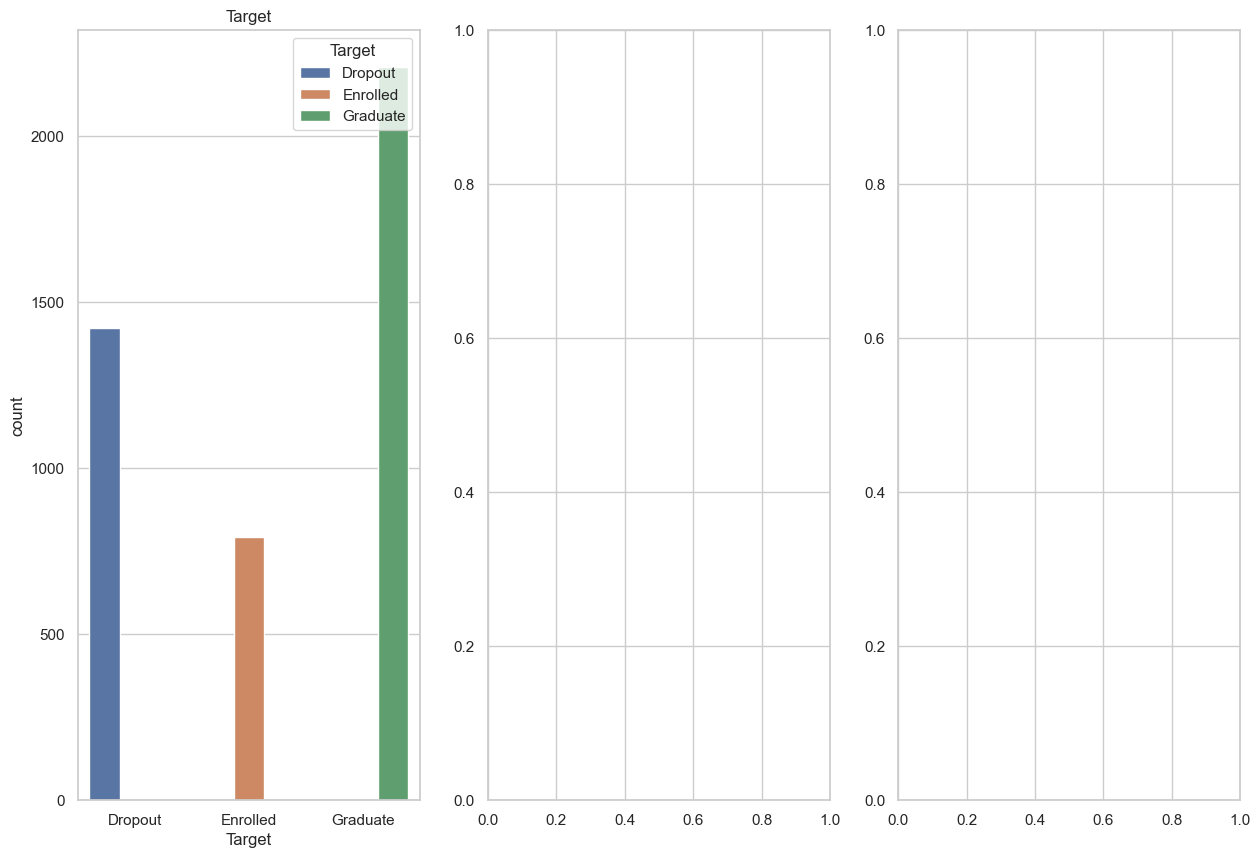

In [14]:
sns.set(style="whitegrid")

# Visualisasi distribusi variabel numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes.flatten()[i], kde=True)
    axes.flatten()[i].set_title(col)

# Visualisasi hubungan antara variabel kategorikal dan target
categorical_columns = df.select_dtypes(include='category').columns
fig, axes = plt.subplots(nrows=len(categorical_columns)//3 + 1, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Target', data=df, ax=axes.flatten()[i])
    axes.flatten()[i].set_title(col)
    axes.flatten()[i].legend(title='Target', loc='upper right')

plt.show()

## K-Means, Hierarchical Clustering

C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


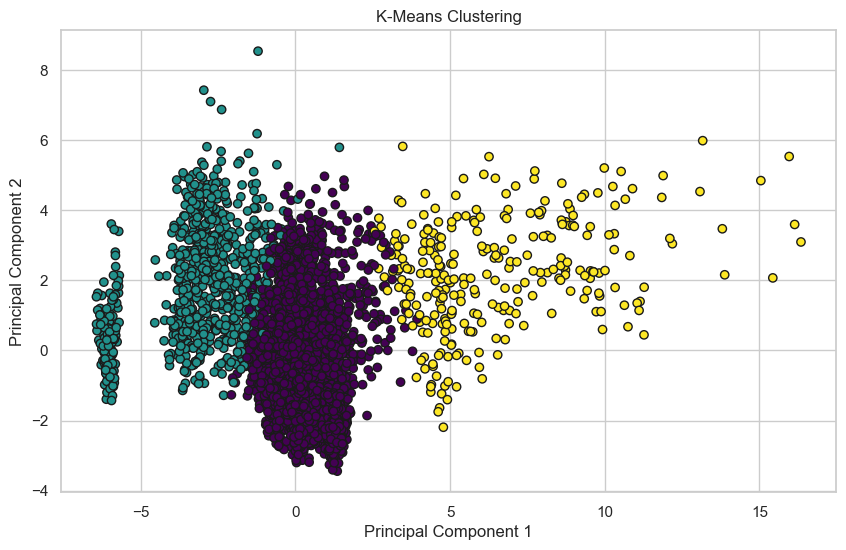

In [16]:
numerical_columns_only = df.select_dtypes(include=['int64', 'float64'])
X = StandardScaler().fit_transform(numerical_columns_only)

kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

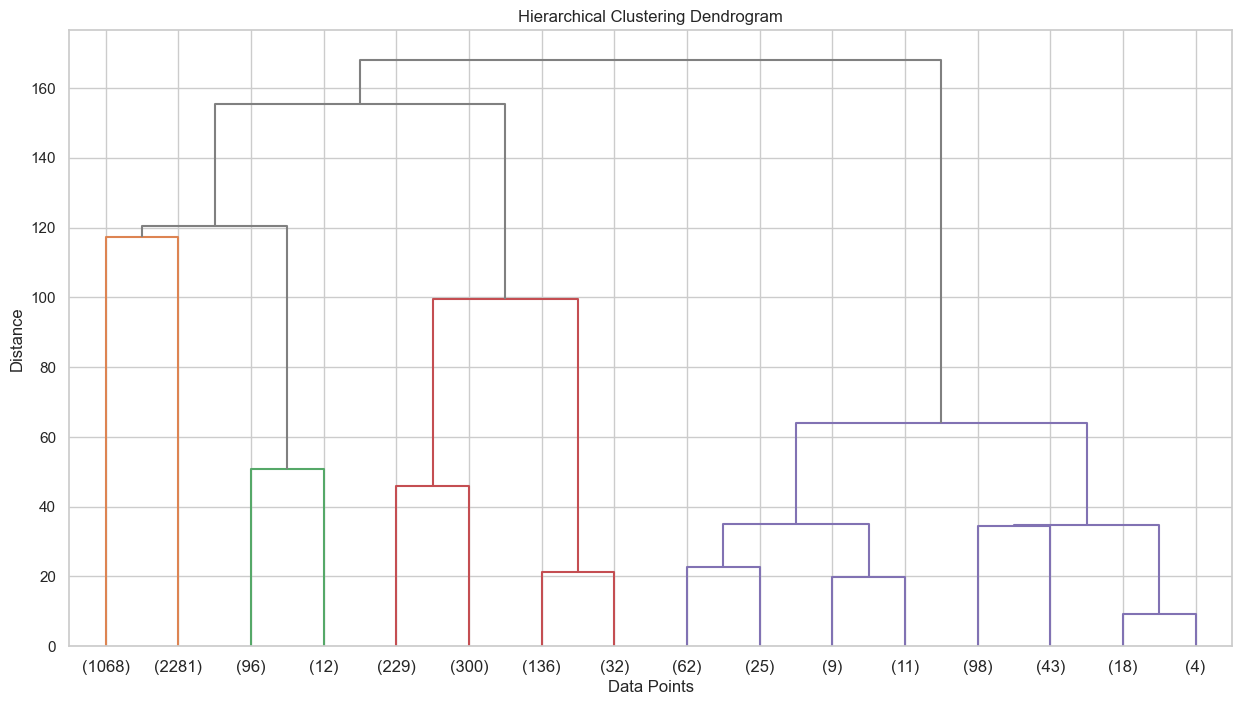

In [20]:
numerical_columns_only = df.select_dtypes(include=['int64', 'float64'])
X_hierarchical = StandardScaler().fit_transform(numerical_columns_only)

method = 'ward'
metric = 'euclidean'

Z = linkage(X_hierarchical, method=method, metric=metric)

plt.figure(figsize=(15, 8))
dendrogram(Z, truncate_mode='level', p=3, orientation='top', color_threshold=None, above_threshold_color='grey', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [25]:
# Pilih kolom untuk fitur (X) dan target (y)
X = df.drop(['Target', 'KMeans_Cluster'], axis=1)  # Hapus kolom target dan KMeans_Cluster jika sudah ada
y = df['Target']

# Bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_predictions))

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))

Decision Tree Accuracy: 0.6768361581920904
              precision    recall  f1-score   support

     Dropout       0.73      0.64      0.68       316
    Enrolled       0.36      0.41      0.38       151
    Graduate       0.77      0.80      0.79       418

    accuracy                           0.68       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.69      0.68      0.68       885


Random Forest Accuracy: 0.7604519774011299
              precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.49      0.30      0.37       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885


SVM Accuracy: 0.47231638418079097
              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       316
    Enr

C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\james\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Decision Tree:
Akurasi: 67.68%
Menunjukkan kinerja yang cukup baik dalam mengklasifikasikan kategori "Graduate", tetapi kurang baik dalam mengklasifikasikan kategori lainnya.

Random Forest:
Akurasi: 76.05%
Menunjukkan kinerja yang lebih baik daripada Decision Tree, dengan meningkatkan kemampuan mengklasifikasikan kategori "Dropout" dan "Graduate".

SVM (Support Vector Machine):
Akurasi: 47.23%
Terlihat memiliki kinerja yang rendah, terutama karena tidak dapat memprediksi kategori "Dropout" dan "Enrolled" dengan baik.